# Exercise Solutions - Day 7
*August 7, 2024*

*I School Python Bootcamp*

*Author: Lauren Chambers*

## Lab 7A - Inheritance & Private Methods

### Exercise 1
*Private methods*

Create a new class, `Fraction`:
- The constructor should assign two attributes: a numerator and denominator.
- Add a private method to define how multiplication works. It should look like this to start:
    ```python
    def __mul__(self, other_fraction):
        # Your code
        return product
    ```
- Add a private method to define the string representation of the fraction.
- Test out your code by defining two fractions, printing them out, and multiplying them by one another.

In [53]:
class Fraction:
    # constructor method
    def __init__(self, numerator, denominator):
        self.n = numerator
        self.d = denominator

    # private multiplication method
    def __mul__(self, other_fraction):
        # Option 1: Return product as float
        # product = (self.n * other_fraction.n) / (self.d * other_fraction.d)

        # Option 2: Return product as fraction
        product = Fraction(self.n * other_fraction.n, self.d * other_fraction.d)
        return product

    # private string representation method
    def __str__(self):
        return f"{self.n}/{self.d}" # "{}/{}".format(self.n, self.d)

    # Bonus challenge: work out how to simplify fractions using their greatest common denominator
    # def simplify(n, d):
    #     '''divides two integers by their common factor.'''
    #     common_factor = fractionsgcd(n, d)
    #     n /= common_factor
    #     d /= common_factor
    #     return n, d

In [54]:
f = Fraction(3, 5)
print(f)

3/5


In [56]:
prod = Fraction(3, 5) * Fraction(1, 3)
print(prod)

3/15


### Exercise 2
*Inheritance*

Create a basic inheritance structure where a child class inherits from a parent class and overrides a method:

 - Create a class named `Animal` with a method `speak()` that prints "The animal makes a sound."
- Create a subclass named `Dog` that inherits from `Animal`.
- Override the `speak()` method in the `Dog` class to print "The dog barks."

In [7]:
# Parent class
class Animal:
    def speak(self):
        print("The animal makes a sound")

# Subclass
class Dog(Animal):
    def speak(self):
        print("The dog barks")

In [9]:
tiger = Animal()
tiger.speak()

The animal makes a sound


In [11]:
chihuahua = Dog()
chihuahua.speak()

The dog barks


## Lab 7B - OOP in Practice

### Exercise 1

Write a Python program to create a class representing a `Ellipse`. Include:
- methods to calculate its area and perimeter (Google the formulas if you don't remember 😉)
- a method to flip the ellipse, that is, swap its x-radius and its y-radius
- a method to draw the ellipse using `drawsvg` (see [here](https://cduck.github.io/drawsvg/#ellipse) for documentation)

In [21]:
import math

In [69]:
class Ellipse:
    # constructor method
    def __init__(self, rx, ry):
        self.rx = rx
        self.ry = ry

    def area(self):
        # Area = 2π * r_x * r_y
        return math.pi * self.rx * self.ry

    def perimeter_approx(self):
        # See https://www.mathsisfun.com/geometry/ellipse-perimeter.html
        return 2 * math.pi * ((self.rx**2 + self.ry**2) / 2)**.5

    def flip(self):
        # First save out old versions of rx and ry
        old_rx = self.rx
        old_ry = self.ry

        # Then reassign
        self.rx = old_ry
        self.ry = old_rx

    def draw(self):
        # Initialize
        d = draw.Drawing(300, 250, "center")
        # Draw
        ellipse = draw.Ellipse(0, 0, self.rx, self.ry, 
                               fill="none", stroke="black")
        d.append(ellipse)
        # Display
        return d

In [70]:
e = Ellipse(100, 50)
e

In [71]:
e.area()

15707.963267948966

In [72]:
e.perimeter_approx()

496.7294132898051

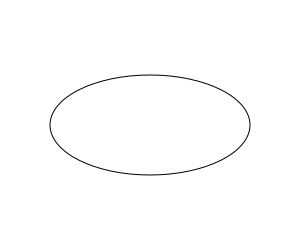

In [73]:
e.draw()

In [74]:
e.flip()

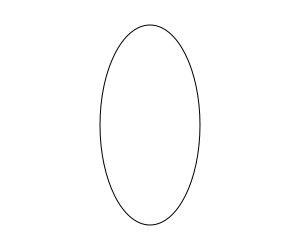

In [75]:
e.draw()

### Exercise 2

First, load in the `USpresidents.txt` file as a list of lists.

*Hint: Look at Lab 4A to remember file operations, and use `readlines()` and `split(":")`.*

Next, create a President class. 
1. This class should have a constructor (`__init__()` that takes one argument, the index number of the president (1-44), and instantiates an object containing associated information from the presidents.txt file. In the constructor, assign the following attributes:
- term_number
- first_name
- last_name
- birth_date
- death_date
- birth_place
- birth_state
- term_start_date
- term_end_date
- party

For example:
```python
obama = President(44)
obama.first_name # Barack
obama.term_start_date # 2009-01-20
obama.party # Democratic
```

2. Add a method `inauguration_age()` that calculate's the president's age at the start of their term.

3. Add a method `plot_ages()` that uses `matplotlib` to create a line plot with all of the president's inaugural ages versus their term number (1-44). Add a red dot for the specific instance's president (at the coordinate (`self.term_number`, `self.inauguration_age`)).

In [78]:
# Load in the presidents data
with open("USpresidents.txt", "r") as fo:
    # Load each line as a list item
    presidents_data = fo.readlines()

# Split each row into lists
presidents_data = [row.replace("\n", "").split(":") for row in presidents_data]
presidents_data

[['1',
  'Washington',
  'George',
  '1732-02-22',
  '1799-12-14',
  'Westmoreland County',
  'Virginia',
  '1789-04-30',
  '1797-03-04',
  'no party'],
 ['2',
  'Adams',
  'John',
  '1735-10-30',
  '1826-07-04',
  'Braintree, Norfolk',
  'Massachusetts',
  '1797-03-04',
  '1801-03-04',
  'Federalist'],
 ['3',
  'Jefferson',
  'Thomas',
  '1743-04-13',
  '1826-07-04',
  'Albermarle County',
  'Virginia',
  '1801-03-04',
  '1809-03-04',
  'Democratic - Republican'],
 ['4',
  'Madison',
  'James',
  '1751-03-16',
  '1836-06-28',
  'Port Conway',
  'Virginia',
  '1809-03-04',
  '1817-03-04',
  'Democratic - Republican'],
 ['5',
  'Monroe',
  'James',
  '1758-04-28',
  '1831-07-04',
  'Westmoreland County',
  'Virginia',
  '1817-03-04',
  '1825-03-04',
  'Democratic - Republican'],
 ['6',
  'Adams',
  'John Quincy',
  '1767-07-11',
  '1848-02-23',
  'Braintree, Norfolk',
  'Massachusetts',
  '1825-03-04',
  '1829-03-04',
  'Democratic - Republican'],
 ['7',
  'Jackson',
  'Andrew',
  '1767

In [114]:
class President:
    def __init__(self, term_number):
        self.term_number = term_number

        for row in presidents_data:
            num = int(row[0])
            if num == term_number:
                self.first_name = row[2]
                self.last_name = row[1]
                self.birth_date = row[3]
                self.death_date = row[4]
                self.birth_place = row[5]
                self.birth_state = row[6]
                self.term_start_date = row[7]
                self.term_end_date = row[8]
                self.party = row[9]

    def inauguration_age(self):
        # Turn dates (str) into years (int)
        term_start_yr = int(self.term_start_date[:4])
        birth_yr = int(self.birth_date[:4])
        return term_start_yr - birth_yr

    def plot_ages(self):
        # Calculate list of term numbers for all presidents
        term_nums = [int(row[0]) for row in presidents_data]

        # Calculate list of ages for all presidents
        term_start_yrs = [int(row[7][:4]) for row in presidents_data]
        birth_yrs = [int(row[3][:4]) for row in presidents_data]
        ages = [t - b for t, b in zip(term_start_yrs, birth_yrs)]

        # Create figures
        plt.figure()
        plt.plot(term_nums, ages)
        plt.scatter(self.term_number, self.inauguration_age(), color="red")
        plt.ylabel("Age (yrs)")
        plt.xlabel("Presidential Term Number")
        return plt.show()

In [115]:
obama = President(44)
print(obama.first_name)
print(obama.birth_date)
print(obama.birth_state)
print(obama.term_start_date)
print(obama.party)

Barack Hussein
1961-08-04
Hawaii
2009-01-20
Democratic


In [118]:
obama.inauguration_age()

48

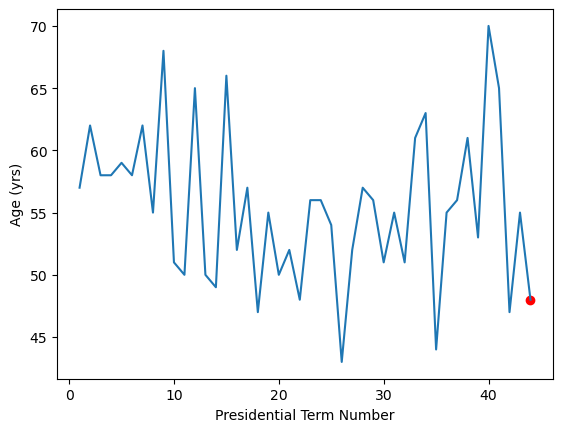

In [116]:
obama.plot_ages()

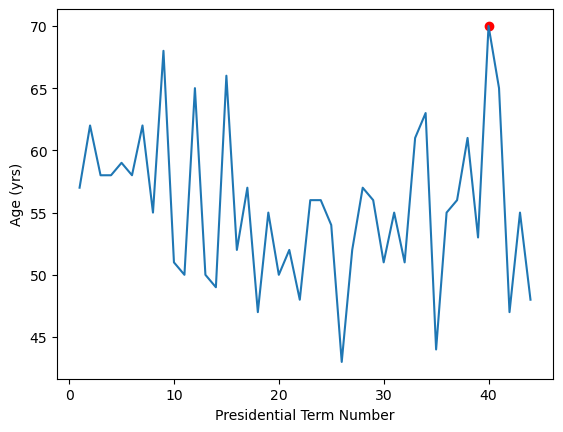

In [117]:
reagan = President(40)
reagan.plot_ages()